 <h1 align=center style=color:red> Analysis of UPI Apps Transaction in 2021 and 2022  <h1/>


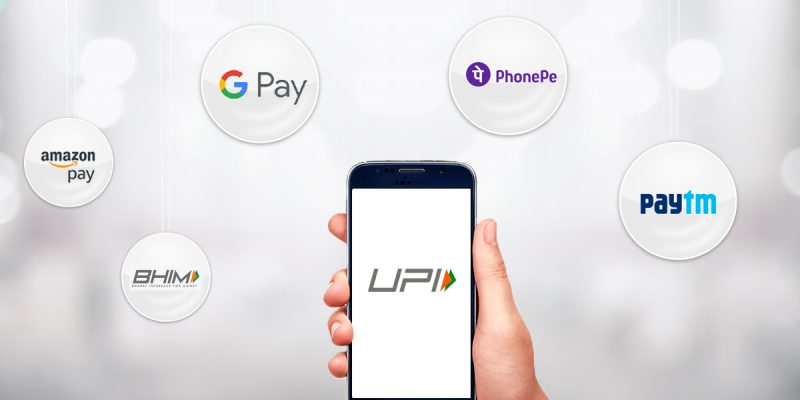

Unified Payments Interface (UPI) is a system that powers multiple bank accounts into a single mobile application (of any participating bank), merging several banking features, seamless fund routing & merchant payments into one hood. It also caters to the “Peer to Peer” collect request which can be scheduled and paid as per requirement and convenience.<br>

Analysis of UPI Apps Transactions on the basis of Volume of transaction and Value of transactions to find out the different patterns and insights in 2021 and 2022 till July.<br>

The dataset is taken from kaggle :https://www.kaggle.com/datasets/ramjasmaurya/upi-apps-transactions-in-2021 .<br>
The two dataset that is used in the analysis are :<br>
1. **UPI apps transaction data in 2021 from jan to dec.csv** -(data available from jan to dec).<br>
2. **UPI apps transaction data in 2022 till july.csv**  - (data available till july).<br>

Thus we combine both data into one file.<br>

In [1]:
# importing basic library
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### 1) Importing the dataset

In [2]:
data1= pd.read_csv(r"C:\Users\Animesh kumar\Desktop\UPI_2021_2022.csv")

In [3]:
data1.style.set_caption('UPI Apps Transaction')

,UPI Banks,Volume (Mn) By Costumers,Value (Cr) by Costumers,Total Volume (Mn),Total Value (Cr),Month,Year
0,Airtel Payments Bank Apps,9.04,2248.49,15.12,5732.09,21-Dec,2021
1,Airtel Payments Bank Apps,8.41,1923.95,15.9,5554.63,21-Nov,2021
2,Airtel Payments Bank Apps,7.6,1491.34,14.31,4746.79,21-Oct,2021
3,Airtel Payments Bank Apps,6.91,1520.92,11.52,3759.12,21-Sep,2021
4,Airtel Payments Bank Apps,6.14,1396.65,9.31,2941.88,21-Aug,2021
5,Airtel Payments Bank Apps,5.79,1534.21,7.36,2342.76,21-Jul,2021
6,Airtel Payments Bank Apps,5.06,1323.26,6.69,2821.94,21-Jun,2021
7,Airtel Payments Bank Apps,4.06,429.12,4.06,429.12,21-May,2021
8,Airtel Payments Bank Apps,3.53,363.66,14.7,11172.43,21-Apr,2021
9,Airtel Payments Bank Apps,3.79,381.74,3.79,381.74,21-Mar,2021


### 2) Rename a column

In [4]:
data1.rename(columns={'Month': 'YearMonth','UPI Banks':  'UPI_Banks','Volume (Mn) By Costumers': 'Volume_(Mn)_By_Costumers','Value (Cr) by Costumers' : 'Value_(Cr)_by_Costumers'},inplace=True)

In [5]:
data1.columns.values[[3,4]] = ['Total_Volume_(Mn)','Total_Value_(Cr)']

In [6]:
data1

,UPI_Banks,Volume_(Mn)_By_Costumers,Value_(Cr)_by_Costumers,Total_Volume_(Mn),Total_Value_(Cr),YearMonth,Year
0,Airtel Payments Bank Apps,9.04,2248.49,15.12,5732.09,21-Dec,2021
1,Airtel Payments Bank Apps,8.41,1923.95,15.9,5554.63,21-Nov,2021
2,Airtel Payments Bank Apps,7.6,1491.34,14.31,4746.79,21-Oct,2021
3,Airtel Payments Bank Apps,6.91,1520.92,11.52,3759.12,21-Sep,2021
4,Airtel Payments Bank Apps,6.14,1396.65,9.31,2941.88,21-Aug,2021
...,...,...,...,...,...,...,...
1101,YuvaPay,0.06,105.39,0.06,105.39,22-Mar,2022
1102,YuvaPay,0.06,103.34,0.06,103.34,22-Apr,2022
1103,YuvaPay,0.04,88.95,0.04,88.95,22-May,2022
1104,YuvaPay,0.03,58.31,0.03,58.31,22-Jun,2022


### 3) Getting some basic information about dataset

In [7]:
data1.head()       #to show top 5 records of dataset

,UPI_Banks,Volume_(Mn)_By_Costumers,Value_(Cr)_by_Costumers,Total_Volume_(Mn),Total_Value_(Cr),YearMonth,Year
0,Airtel Payments Bank Apps,9.04,2248.49,15.12,5732.09,21-Dec,2021
1,Airtel Payments Bank Apps,8.41,1923.95,15.9,5554.63,21-Nov,2021
2,Airtel Payments Bank Apps,7.6,1491.34,14.31,4746.79,21-Oct,2021
3,Airtel Payments Bank Apps,6.91,1520.92,11.52,3759.12,21-Sep,2021
4,Airtel Payments Bank Apps,6.14,1396.65,9.31,2941.88,21-Aug,2021


In [8]:
data1.tail()     #to show last 5 records of dataset

,UPI_Banks,Volume_(Mn)_By_Costumers,Value_(Cr)_by_Costumers,Total_Volume_(Mn),Total_Value_(Cr),YearMonth,Year
1101,YuvaPay,0.06,105.39,0.06,105.39,22-Mar,2022
1102,YuvaPay,0.06,103.34,0.06,103.34,22-Apr,2022
1103,YuvaPay,0.04,88.95,0.04,88.95,22-May,2022
1104,YuvaPay,0.03,58.31,0.03,58.31,22-Jun,2022
1105,YuvaPay,0.01,21.38,0.01,21.38,22-Jul,2022


In [9]:
data1.shape         # to show number of rows and column

(1106, 7)

In [10]:
data1.size            # to show No. of total number of values in dataset

7742

In [11]:
data1.dtypes          # to show data-type of each columns

UPI_Banks                   object
Volume_(Mn)_By_Costumers    object
Value_(Cr)_by_Costumers     object
Total_Volume_(Mn)           object
Total_Value_(Cr)            object
YearMonth                   object
Year                         int64
dtype: object

### 4) To convert object data type into float 

In [12]:
data1['Volume_(Mn)_By_Costumers'] = data1['Volume_(Mn)_By_Costumers'].str.replace(',','')

In [13]:
data1['Value_(Cr)_by_Costumers'] = data1['Value_(Cr)_by_Costumers'].str.replace(',','')

In [14]:
data1['Total_Volume_(Mn)'] = data1['Total_Volume_(Mn)'].str.replace(',','')

In [15]:
data1['Total_Value_(Cr)'] = data1['Total_Value_(Cr)'].str.replace(',','')

In [16]:
data1['Volume_(Mn)_By_Costumers'] = data1['Volume_(Mn)_By_Costumers'].astype(float)

In [17]:
data1['Value_(Cr)_by_Costumers'] = data1['Value_(Cr)_by_Costumers'].astype(float)

In [18]:
data1['Total_Volume_(Mn)'] = data1['Total_Volume_(Mn)'].astype(float)

In [19]:
data1['Total_Value_(Cr)'] = data1['Total_Value_(Cr)'].astype(float)

In [20]:
data1.dtypes

UPI_Banks                    object
Volume_(Mn)_By_Costumers    float64
Value_(Cr)_by_Costumers     float64
Total_Volume_(Mn)           float64
Total_Value_(Cr)            float64
YearMonth                    object
Year                          int64
dtype: object

In [21]:
data1.head(2)

,UPI_Banks,Volume_(Mn)_By_Costumers,Value_(Cr)_by_Costumers,Total_Volume_(Mn),Total_Value_(Cr),YearMonth,Year
0,Airtel Payments Bank Apps,9.04,2248.49,15.12,5732.09,21-Dec,2021
1,Airtel Payments Bank Apps,8.41,1923.95,15.90,5554.63,21-Nov,2021


### 5) To change 'whatsapp*' into "whatsapp" so that we can apply group by functions while calculating different parameters

In [22]:
data1[data1['UPI_Banks']=='WhatsApp*']

,UPI_Banks,Volume_(Mn)_By_Costumers,Value_(Cr)_by_Costumers,Total_Volume_(Mn),Total_Value_(Cr),YearMonth,Year
630,WhatsApp*,2.6,104.19,2.6,104.19,21-Oct,2021


In [23]:
data1['UPI_Banks'].loc[630]=data1['UPI_Banks'].loc[630][:-1] ;

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [24]:
data1['UPI_Banks'].unique()

array(['Airtel Payments Bank Apps', 'Allahabad Bank App', 'Amazon Pay',
       'Andhra Bank App', 'AU Small Finance Bank App', 'Axis Bank Apps',
       'Bajaj Finserv', 'Bank of Baroda Apps', 'Bank of India App',
       'Bank of Maharashtra App', 'BHIM', 'Canara Bank App',
       'Central Bank of India App', 'Citi Bank App',
       'City Union Bank App', 'Cointab', 'Cred', 'DBS Digibank App',
       'Dena Bank App', 'Deutsche Bank App', 'Dhanlaxmi Bank App',
       'Federal Bank App', 'Fino Payments bank App', 'Finshell Pay',
       'Freecharge', 'Goibibo', 'Google Pay', 'HDFC Bank Apps',
       'HSBC Bank App', 'ICICI Bank Apps', 'IDBI Bank App',
       'IDFC Bank App', 'India Post Payments Bank App', 'Indian Bank App',
       'IndusInd Bank App', 'Jammu and Kashmir Bank App',
       'Janta Sahakari Bank App', 'Jio Payments Bank App',
       'Jupiter Money', 'Karnataka Bank App', 'Karur Vysya Bank App',
       'Khalijeb', 'Kotak Mahindra Bank Apps', 'MakeMy Trip', 'MI Pay',
       'Mo

In [25]:
data1.groupby('UPI_Banks')['Total_Value_(Cr)'].sum()

UPI_Banks
AU Small Finance Bank App             609.10
AU Small Finance Bank Apps            573.32
Airtel Payments Bank Apps           54028.14
Allahabad Bank App                    102.03
Allahabad Bank Apps                    26.14
                                     ...    
Utkarsh Small Finance Bank              2.42
Utkarsh Small Finance Bank Apps        20.23
WhatsApp                             2961.06
Yes Bank Apps                      130805.19
YuvaPay                              1059.12
Name: Total_Value_(Cr), Length: 120, dtype: float64

### 6) sum of Total volume of transaction and Total value of transaction

In [26]:
data1['Total_Value_(Cr)'].sum()    # total value of transaction in crore from 2021 january to 2022 july

14110434.17

In [27]:
data1['Total_Volume_(Mn)'].sum()    # total value of transaction in millions from january 2021 to july 2022

78465.85

### 7) Group by sum of all Total value and Total volume of  transaction

In [28]:
data1.groupby("UPI_Banks")['Total_Value_(Cr)'].sum().sort_values(ascending= False)

UPI_Banks
PhonePe                            6673745.02
Google Pay                         5098497.50
Paytm Payments Bank App            1359460.74
Cred                                212550.87
BHIM                                148826.83
                                      ...    
Utkarsh Small Finance Bank               2.42
Jammu and Kashmir Bank Apps              2.15
Bandhan Bank Apps                        1.35
SuperPay                                 1.04
Jupiter Edge (LivQuick PPI App)          0.43
Name: Total_Value_(Cr), Length: 120, dtype: float64

#### 7.a) Top 10  UPI Application by  highest Total value of transaction in crore

In [29]:
df1 =  data1.groupby("UPI_Banks")['Total_Value_(Cr)'].sum().sort_values(ascending= False).head(10)

In [30]:
df1

UPI_Banks
PhonePe                      6673745.02
Google Pay                   5098497.50
Paytm Payments Bank App      1359460.74
Cred                          212550.87
BHIM                          148826.83
ICICI Bank Apps               132395.63
Yes Bank Apps                 130805.19
Amazon Pay                    107578.64
Airtel Payments Bank Apps      54028.14
State Bank of India Apps       39592.65
Name: Total_Value_(Cr), dtype: float64

In [31]:
df1.reset_index()

,UPI_Banks,Total_Value_(Cr)
0,PhonePe,6673745.02
1,Google Pay,5098497.50
2,Paytm Payments Bank App,1359460.74
3,Cred,212550.87
4,BHIM,148826.83
5,ICICI Bank Apps,132395.63
6,Yes Bank Apps,130805.19
7,Amazon Pay,107578.64
8,Airtel Payments Bank Apps,54028.14
9,State Bank of India Apps,39592.65


In [40]:
 df1 = df1.reset_index()

In [33]:
df1

,UPI_Banks,Total_Value_(Cr)
0,PhonePe,6673745.02
1,Google Pay,5098497.50
2,Paytm Payments Bank App,1359460.74
3,Cred,212550.87
4,BHIM,148826.83
5,ICICI Bank Apps,132395.63
6,Yes Bank Apps,130805.19
7,Amazon Pay,107578.64
8,Airtel Payments Bank Apps,54028.14
9,State Bank of India Apps,39592.65


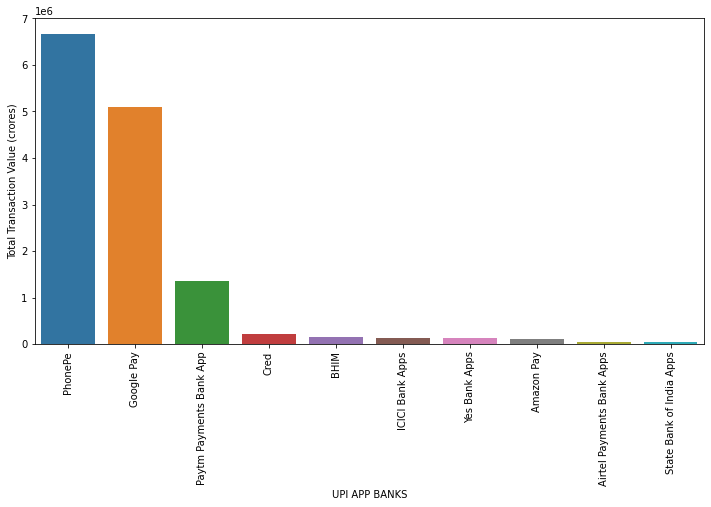

In [34]:
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='UPI_Banks', y='Total_Value_(Cr)', data=df1)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.xlabel("UPI APP BANKS")
plt.ylabel("Total Transaction Value (crores)");

In [35]:
df1

,UPI_Banks,Total_Value_(Cr)
0,PhonePe,6673745.02
1,Google Pay,5098497.50
2,Paytm Payments Bank App,1359460.74
3,Cred,212550.87
4,BHIM,148826.83
5,ICICI Bank Apps,132395.63
6,Yes Bank Apps,130805.19
7,Amazon Pay,107578.64
8,Airtel Payments Bank Apps,54028.14
9,State Bank of India Apps,39592.65


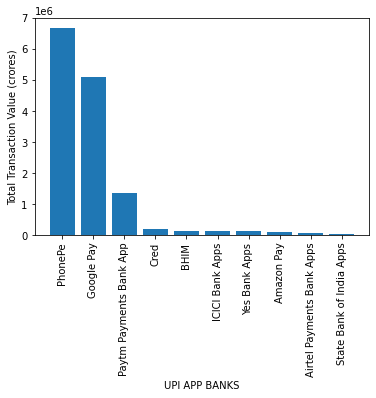

In [44]:
plt.xlabel('UPI APP BANKS')
plt.ylabel('Total Transaction Value (crores)')

plt.bar(df1.UPI_Banks,df1['Total_Value_(Cr)'])
plt.xticks(rotation=90);

#### 7.b) Top 10  UPI Application by  lowest Total value of transaction in crore

In [37]:
df2 = data1.groupby("UPI_Banks")['Total_Value_(Cr)'].sum().sort_values(ascending= True).head(10)

In [38]:
  df2 = df2.reset_index()

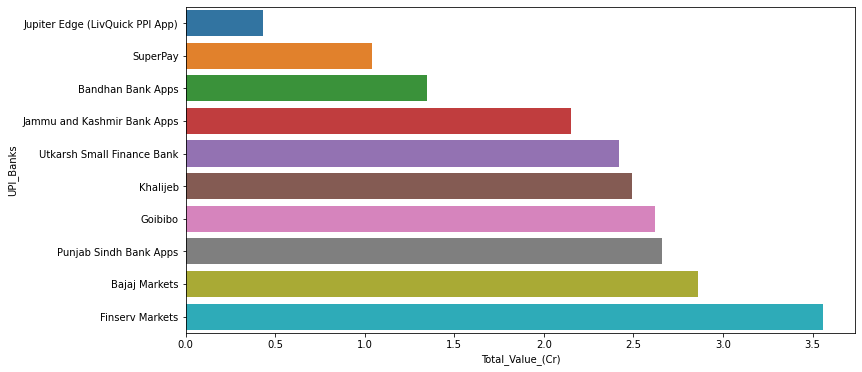

In [39]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df2, x="Total_Value_(Cr)", y="UPI_Banks" , orient = "h");




#### 7.c) Top 10  UPI Application by  highest Total Volume of transaction in millions

In [ ]:
df3 = data1.groupby("UPI_Banks")['Total_Volume_(Mn)'].sum().sort_values(ascending= False).head(10)

In [ ]:
   df3.reset_index()

In [ ]:
df3 = df3.reset_index()

In [ ]:
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='UPI_Banks', y='Total_Volume_(Mn)', data=df3)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.xlabel("UPI APP BANKS")
plt.ylabel("Total Transaction Volume (crores)");






#### 7.d) Top 10  UPI Application by  Lowest Total Volume of transaction in millions

In [ ]:
data1.groupby("UPI_Banks")['Total_Volume_(Mn)'].sum().sort_values(ascending= True).head(10)

### 8)  Sum of all  Value(Not total) and  Volume(Not total) of  transaction by Customers

In [ ]:
data1['Volume_(Mn)_By_Costumers'].sum()    # total volume of transaction in millions by consumers from 2021 january to 2022 july

In [ ]:
data1['Value_(Cr)_by_Costumers'].sum()    # total value of transaction in crores by consumers from january 2021 to july 2022

### 9) Group by sum of  Value and  Volume of  transaction by customers

In [ ]:
data1.groupby("UPI_Banks")['Value_(Cr)_by_Costumers'].sum().sort_values(ascending= False)

#### 9.a)  Top 10  UPI Application by  highest  Value of transaction  by Customer in crore

In [ ]:
data1.groupby("UPI_Banks")['Value_(Cr)_by_Costumers'].sum().sort_values(ascending= False).head(10)

#### 9.b)  Top 10  UPI Application by  Lowest  Value of transaction  by Customer in crores.

In [ ]:
data1.groupby("UPI_Banks")['Value_(Cr)_by_Costumers'].sum().sort_values(ascending= True).head(10)

In [ ]:
data1.head(4)

#### 9.c)  Top 10  UPI Application by  Lowest  Value of transaction  by Customer in crores.

In [ ]:
data1.groupby("UPI_Banks")['Volume_(Mn)_By_Costumers'].sum().sort_values(ascending= False).head(10)

###  10) Percentage of top 10 UPI Apps on the basis of different transaction from january 2021 to july 2022

#### 10.a) Percentage of Total(Value) transaction of each app in top 10  in  sum of Total value  transaction of all apps

In [ ]:
percentage_value = ((data1.groupby("UPI_Banks")['Total_Value_(Cr)'].sum().sort_values(ascending= False).head(10))/data1['Total_Value_(Cr)'].sum()) *100

In [ ]:
percentage_value

#### 10.b) Percentage of Total(Volume) transaction of each app in top 10  in  sum of Total Volume  transaction of all apps

In [ ]:
percentage_volume = ((data1.groupby("UPI_Banks")['Total_Volume_(Mn)'].sum().sort_values(ascending= False).head(10))/data1['Total_Volume_(Mn)'].sum()) *100

In [ ]:
percentage_volume

### 11)